In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Discoverd Data

In [3]:
df=pd.read_csv("Daily_Gold_Price_on_World.csv" ,index_col='Date',parse_dates=["Date"])
df.head()

,US dollar (USD),Euro (EUR),Japanese yen (JPY),Pound sterling (GBP),Canadian dollar (CAD),Swiss franc (CHF),Indian rupee (INR),Chinese renmimbi (CNY),Turkish lira (TRY),Saudi riyal (SAR),Indonesian rupiah (IDR),UAE dirham (AED),Thai baht THB),Vietnamese dong (VND),Egyptian pound (EGP),Korean won (KRW),Russian ruble (RUB),South African rand (ZAR),Australian dollar (AUD)
Date,,,,,,,,,,,,,,,,,,,
1979-01-01,226.00,137.06,0.00,110.70,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00
1979-01-02,226.80,137.29,43164.91,111.45,263.74,359.62,1792.85,0.0,0.0,735.60,138160.45,851.29,4454.55,0.0,0.0,107470.04,0.0,194.56,193.61
1979-01-03,218.60,134.01,43717.90,107.98,264.39,365.87,1802.15,0.0,0.0,739.42,138877.01,855.71,4477.66,0.0,0.0,108027.43,0.0,192.23,192.97
1979-01-04,223.15,136.79,43674.89,110.66,264.14,366.38,1811.74,0.0,0.0,743.36,139616.26,860.26,4501.49,0.0,0.0,108602.47,0.0,193.01,194.55
1979-01-05,225.50,138.35,44582.47,111.63,268.39,373.72,1843.57,0.0,0.0,756.42,142069.10,875.38,4580.57,0.0,0.0,110510.44,0.0,196.40,197.94


# Drop some coulmns no contain values

In [4]:

df.drop(["Chinese renmimbi (CNY)","Turkish lira (TRY)","Vietnamese dong (VND)","Egyptian pound (EGP)","Russian ruble (RUB)"],axis=1,inplace=True)

In [5]:
df.head()


,US dollar (USD),Euro (EUR),Japanese yen (JPY),Pound sterling (GBP),Canadian dollar (CAD),Swiss franc (CHF),Indian rupee (INR),Saudi riyal (SAR),Indonesian rupiah (IDR),UAE dirham (AED),Thai baht THB),Korean won (KRW),South African rand (ZAR),Australian dollar (AUD)
Date,,,,,,,,,,,,,,
1979-01-01,226.00,137.06,0.00,110.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1979-01-02,226.80,137.29,43164.91,111.45,263.74,359.62,1792.85,735.60,138160.45,851.29,4454.55,107470.04,194.56,193.61
1979-01-03,218.60,134.01,43717.90,107.98,264.39,365.87,1802.15,739.42,138877.01,855.71,4477.66,108027.43,192.23,192.97
1979-01-04,223.15,136.79,43674.89,110.66,264.14,366.38,1811.74,743.36,139616.26,860.26,4501.49,108602.47,193.01,194.55
1979-01-05,225.50,138.35,44582.47,111.63,268.39,373.72,1843.57,756.42,142069.10,875.38,4580.57,110510.44,196.40,197.94


In [7]:
df.index.is_unique

True

# Feature engineering

<AxesSubplot:xlabel='Date'>

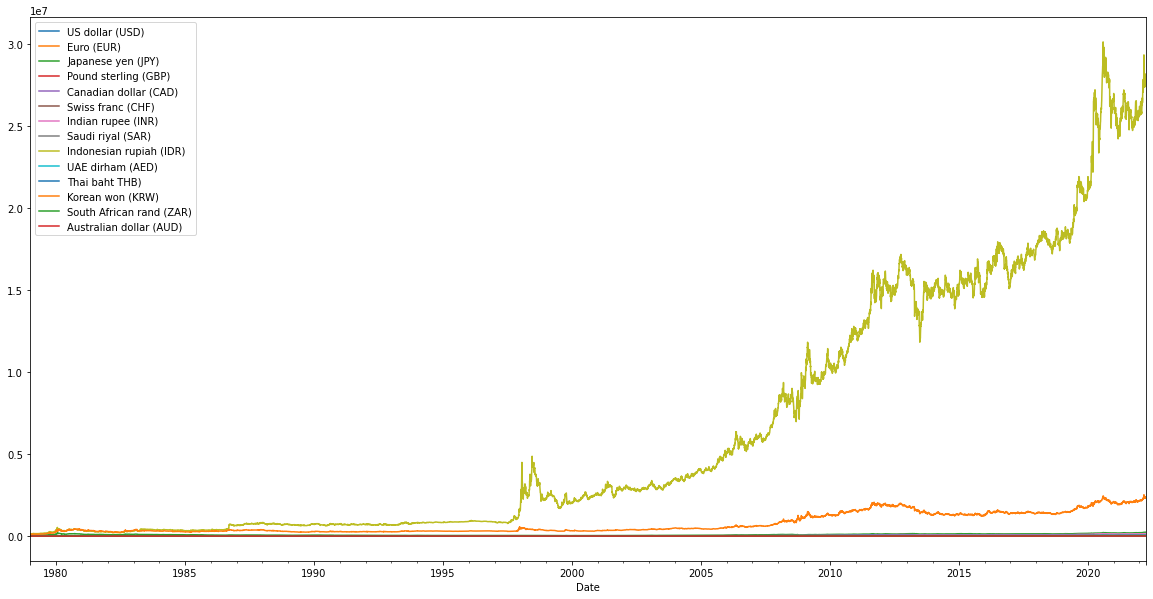

In [8]:
df.plot(figsize=(20,10))


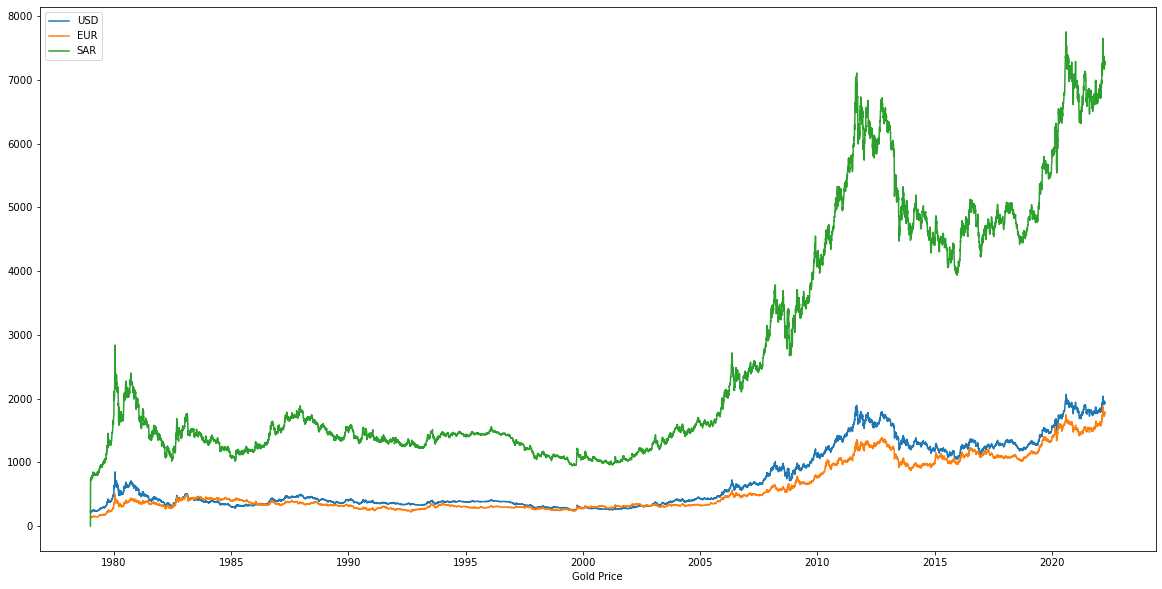

In [9]:
plt.figure(figsize=(20,10))
plt.xlabel("date")
plt.xlabel("Gold Price")
plt.plot(df.iloc[:,0],label="USD")
plt.plot(df.iloc[:,1],label="EUR")
plt.plot(df.iloc[:,7],label="SAR")


plt.legend()

# Now I can understand that the price of gold is almost fixed at the level of most countries, but the value of the currency differs from one another, so I can rely only on the dollar

In [67]:
gold_usd=df[["US dollar (USD)"]]

In [68]:
gold_usd["change"]=(gold_usd["US dollar (USD)"].pct_change())*100
gold_usd=gold_usd.dropna()
gold_usd.head()

,US dollar (USD),change
Date,,
1979-01-02,226.80,0.353982
1979-01-03,218.60,-3.615520
1979-01-04,223.15,2.081427
1979-01-05,225.50,1.053103
1979-01-08,223.10,-1.064302


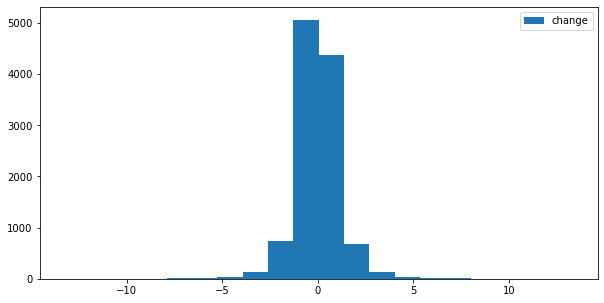

In [12]:
plt.figure(figsize=(10,5))


plt.hist(gold_usd["change"],label="change",bins=20)
plt.legend()

### 2.5% Rule



In [69]:
gold_usd=gold_usd.sort_values(by="change")
ratio=gold_usd.count().change
ratio*=.025
ratio=int(ratio)
gold_usd=gold_usd.iloc[ratio:-ratio,:]
gold_usd=gold_usd.sort_index()

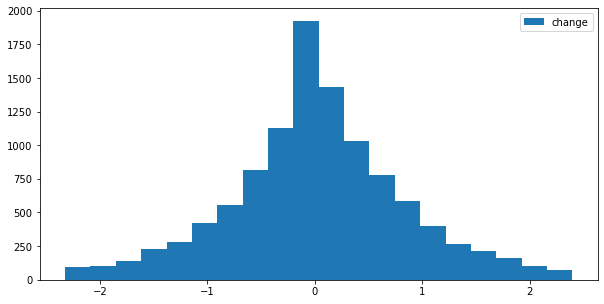

In [70]:
plt.figure(figsize=(10,5))


plt.hist(gold_usd["change"],label="change",bins=20)
plt.legend()


# Split data

In [66]:
from sklearn.model_selection import train_test_split
X=gold_usd.index.to_frame()
y=gold_usd["US dollar (USD)"]
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.30)

# SVM Algorithm

In [17]:
from sklearn.svm import SVR
regressor = SVR(C=15,epsilon=.05,kernel="rbf")
regressor.fit(X_train, y_train)
regressor.score(X_train, y_train)

0.9063847911265802

In [18]:
gold_usd["Prediction_SVR"]=regressor.predict(gold_usd.index.to_frame())

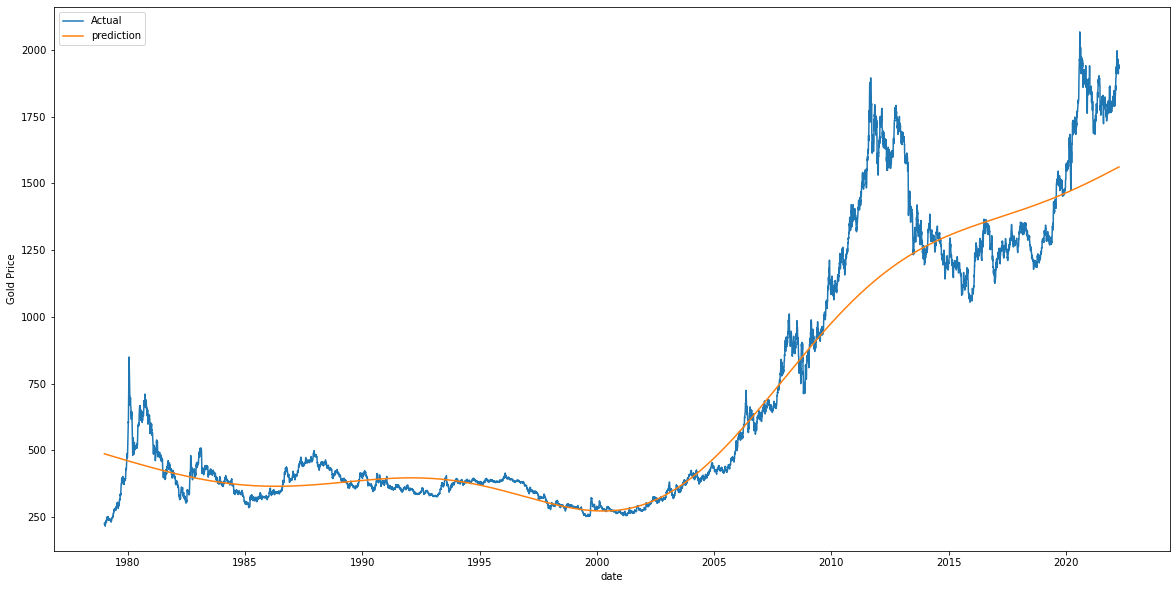

In [19]:
plt.figure(figsize=(20,10))
plt.xlabel("date")
plt.ylabel("Gold Price")
plt.plot(gold_usd["US dollar (USD)"],label="Actual")
plt.plot(gold_usd["Prediction_SVR"],label="prediction")



plt.legend()

In [20]:
today=np.datetime64("2022-08-06","ns")
regressor.predict([[today]])

array([1577.03179478])

# Random forest

In [21]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=1)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9994517605220306

In [22]:
gold_usd["Prediction_RF"]=model.predict(gold_usd.index.to_frame())

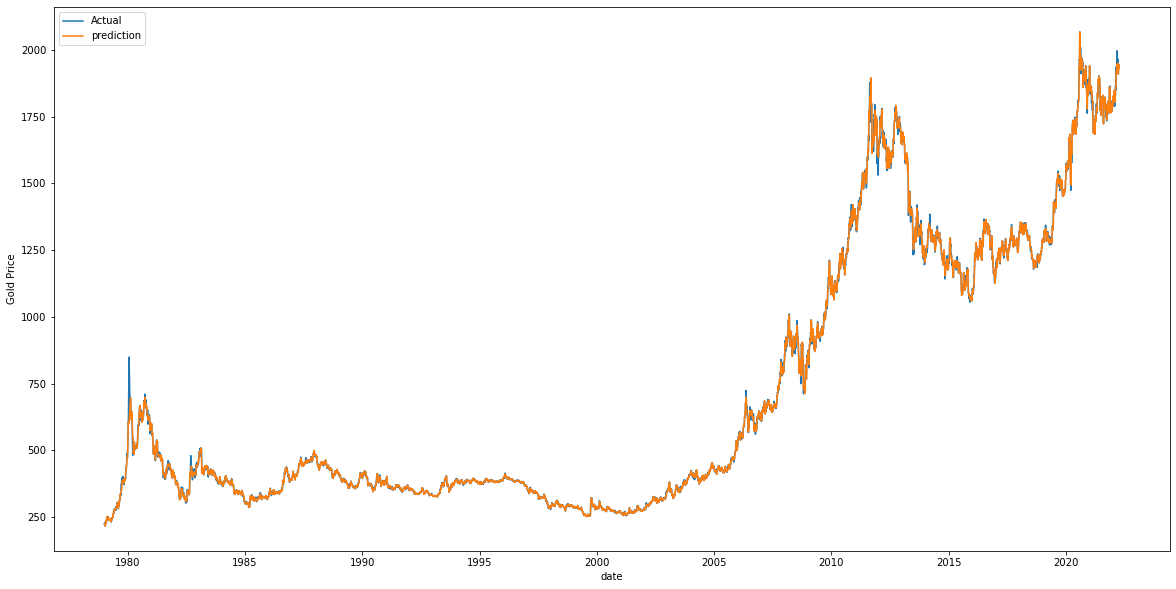

In [23]:
plt.figure(figsize=(20,10))
plt.xlabel("date")
plt.ylabel("Gold Price")
plt.plot(gold_usd.index,gold_usd["US dollar (USD)"],label="Actual")
plt.plot(gold_usd.index,gold_usd["Prediction_RF"],label="prediction")



plt.legend()

In [40]:
today=np.datetime64("2022-08-06","ns")
model.predict([[today]])

array([1930.15])

# Linear regression

In [72]:
gold_usd['Time'] = np.arange(1,len(gold_usd.index)+1)
W = gold_usd.loc[:, ['Time']]  # features
e = gold_usd.loc[:, "US dollar (USD)"]

In [73]:
from sklearn.linear_model import LinearRegression
model2=LinearRegression()
model2.fit(W,e)
model2.score(W,e)


0.6459517558351602

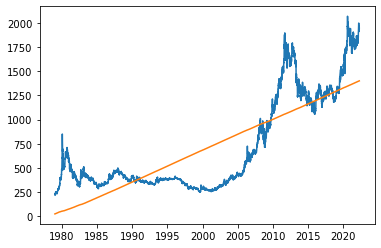

In [74]:
plt.plot(gold_usd.index,gold_usd["US dollar (USD)"],label="Actual")
plt.plot(gold_usd.index,model2.predict(W),label="prediction")

In [75]:
gold_usd.head()

,US dollar (USD),change,Time
Date,,,
1979-01-02,226.80,0.353982,1
1979-01-04,223.15,2.081427,2
1979-01-05,225.50,1.053103,3
1979-01-08,223.10,-1.064302,4
1979-01-09,224.00,0.403407,5


In [79]:
value=np.busday_count('1979-01-02', '2022-08-06')
model2.predict([[value]])

array([1482.73907479])

# Actual Gold Price Today (2022-08-06) is 1775 USD
## note : RF Model Overfitting so we can't depend on that